<a href="https://colab.research.google.com/github/temple17/hands-on-ml-practice/blob/main/Task1_California_Housing_Price_Self_review(~p_89).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download the data

# deal with operation system : dir
import os

# read gzip, bz2, lzma, tar 
import tarfile

# get data from url
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# combine two pathh into one path
HOUSING_PATH = os.path.join("datasets", "housing")
# get housing tgz file
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    # make dir if there is not
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    # cancellation of compression 
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f722a204190>,
      dtype=object)

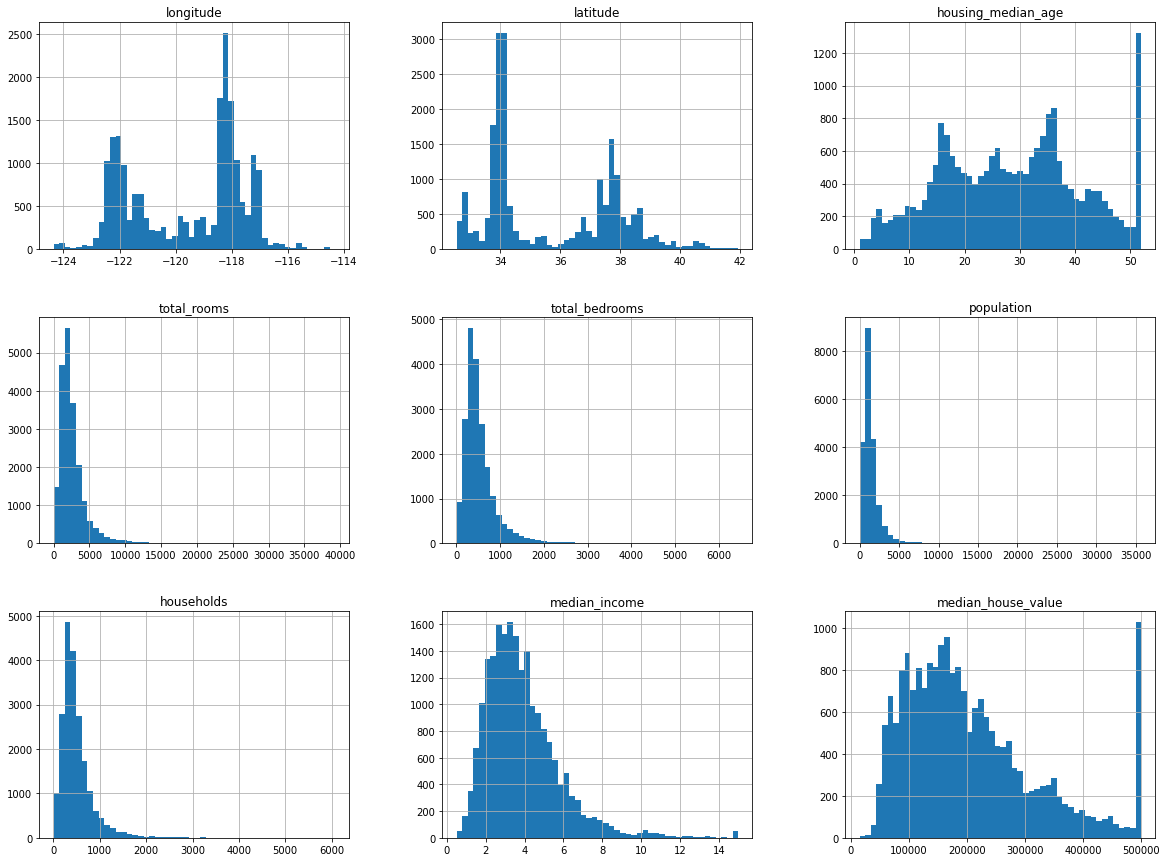

In [15]:
housing.hist(bins = 50, figsize=(20,15))

In [16]:
import numpy as np
# create function which splits train set and test set
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(housing, 0.2)

In [18]:
# another way to split dataset 
# the simplest way

from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [21]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [22]:
housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [23]:
# change median_income into categorical feature 

housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

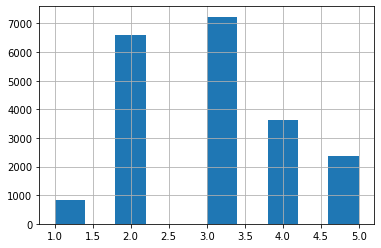

In [24]:
housing['income_cat'].hist()

In [25]:
# conduct stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
# set test_size, random_state, split set n
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# return index of each datasets based on income_cat proportions
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
# remove income_cat

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [28]:
# allocate train_set as housing
housing = strat_train_set.copy()

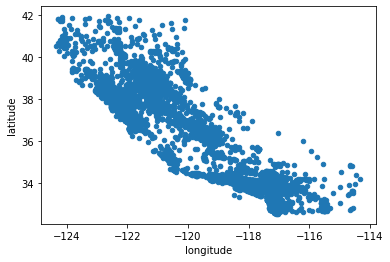

In [29]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

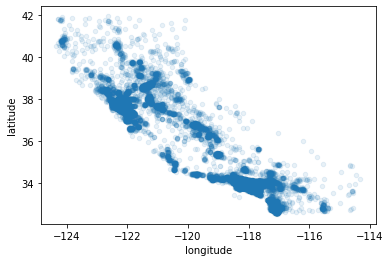

In [30]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

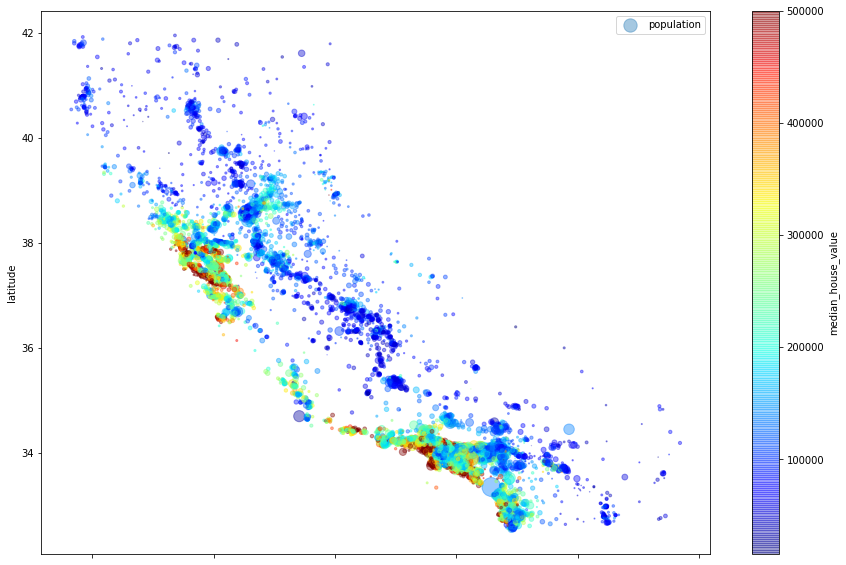

In [31]:
# more in depth

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s = housing['population']/100, label = 'population', figsize = (15,10),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)

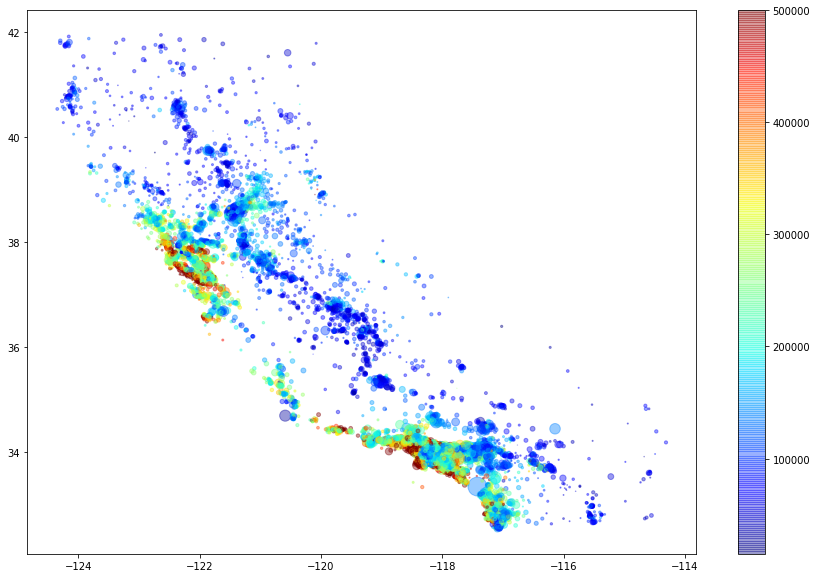

In [32]:
# visualize with plt.scatter on my own
plt.figure(figsize = (15,10))
plt.scatter(housing['longitude'], housing['latitude'], cmap = "jet", alpha =0.4, s = housing['population']/100,
            c = housing['median_house_value'])
plt.colorbar()

In [33]:
# look for correlations

corr_matrix = housing.corr()

In [34]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7219b79110>,
      dtype=object)

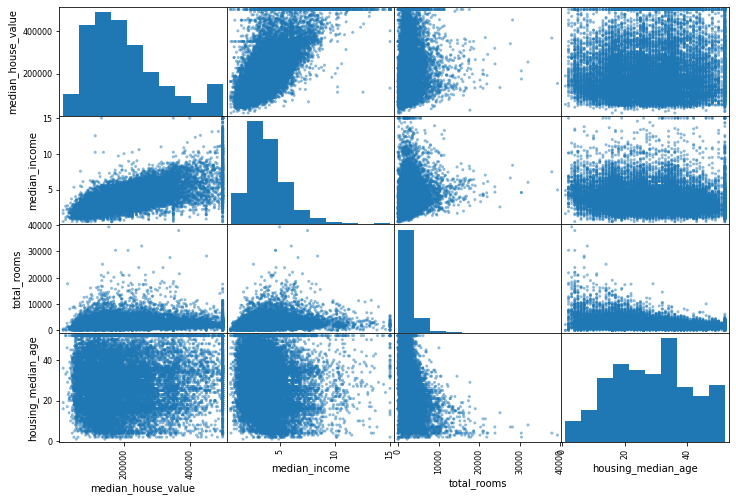

In [35]:
# another way to see correlation

from pandas.plotting import scatter_matrix

# save features in a list
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes], figsize = (12,8))

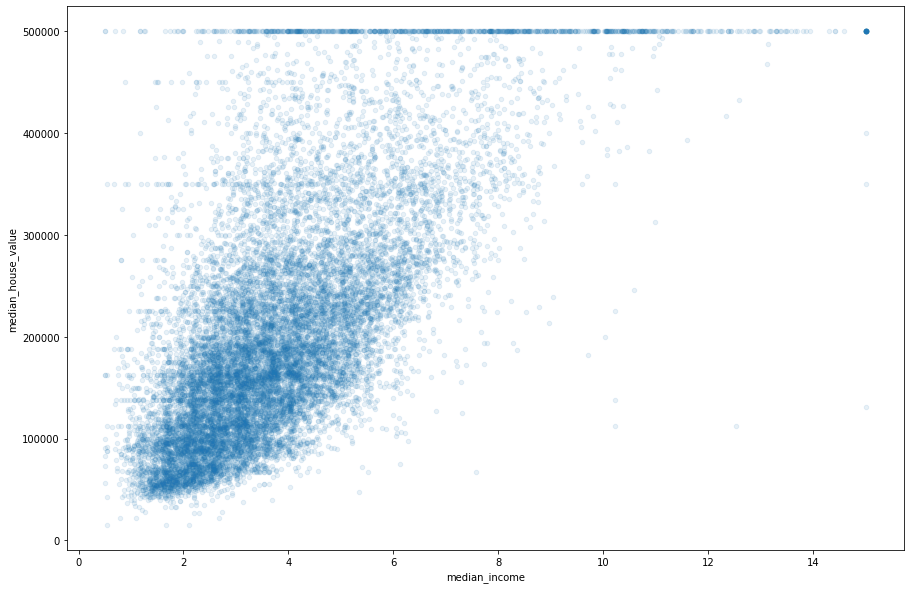

In [36]:
# zoom in on median house value & median_income

housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', figsize = (15,10), alpha = 0.1)

In [37]:
# new features to see higher correlation between number of rooms and house value

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [38]:
# lets see correlation

corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [39]:
# prepare for ml algorithms => drop predictor feature : median_house_value

housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [40]:
# now deal with missing values using SimpleImputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [41]:
housing_num = housing.drop('ocean_proximity', axis =1)

In [42]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [43]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [44]:
X = imputer.transform(housing_num)

In [45]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [46]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [47]:
# handle with text and categorical : ocean_proximity

housing_cat = housing[['ocean_proximity']]

In [48]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [49]:
# conduct fit & transform in a trial
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [53]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
# custom transformers

from sklearn.base import BaseEstimator, TransformerMixin

In [56]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [57]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self   # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [58]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [59]:
# Feature Scailing

# scailing the target values is generally not required

# min-max scailing & standarization

In [60]:
# Transformation pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
])

# must have a fit_transform method
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [61]:
# use ColumnTransformer to be more convenient to have a single transformer
# able to handle all columns, apply appropriate transformations to each column.

# more convenient method using ColumnTransformer

from sklearn.compose import ColumnTransformer


num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# num_pipeline : Scail number type columns
# OneHotEncoder() : handle categorical data type

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

"""
How it works

1. import the ColumnTransformer class
2. get the list of numerical column names 
and the list of categorical column names, and construct ColumnTransformer
3. Finally apply this ColumnTrasformer to the housing data
"""

'\nHow it works\n\n1. import the ColumnTransformer class\n2. get the list of numerical column names \nand the list of categorical column names, and construct ColumnTransformer\n3. Finally apply this ColumnTrasformer to the housing data\n'

In [62]:
# Select and Train a Model

# Training and Evaluating on the Training Set

# 1. Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [64]:
# measure this regression model's RMSE on the whole training set

from sklearn.metrics import mean_squared_error

# predict with whole dataset

housing_predictions = lin_reg.predict(housing_prepared)

# mean_squared_error(correct target values, estimated values)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [65]:
# as a result: this model is not powerful enough
# the main ways to fix underfitting are to select a more powerful model
# try DecisionTreeRegression 
# : capable of finding complex nonlinear relationships in the data

In [66]:
# 2. DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [67]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

 
# tree_rmse = 0 : doesn't mean that this model really be absolutely perfect
# => rather it is much more likely that the model badly overfit the data
# need to use part of the trainig set for training, and part for model validataion

0.0

In [68]:
# Better Evaluation Using Cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [69]:
# look at the results

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [70]:
display_scores(tree_rmse_scores)

Scores: [69994.10219908 67485.03689535 70592.11605912 69965.09612651
 72152.00635466 74899.06246981 71616.13930451 70793.05972816
 76330.4863727  70352.96177712]
Mean: 71418.00672870257
Standard deviation: 2421.608912106796


In [71]:
# compute the same scores for the Linear Regression model

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


In [72]:
# 3. RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                              scoring = "neg_mean_squared_error", cv = 10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [49137.74147568 47165.68479987 49510.19012734 52021.66366848
 49829.50467444 53395.77590434 48779.23740765 47887.08608958
 52907.75298411 50407.63808731]
Mean: 50104.22752187897
Standard deviation: 1978.1673773509917


In [73]:
# Fine-Tune model

# All I need to do is tell it which hyperparameters I want
# it to experiment with, and what values to try out, and it wil evaluate
# all the possible combinations of hyperparmeter values,
# using cross-validation

from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [74]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [75]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63801.05605913009 {'max_features': 2, 'n_estimators': 3}
55045.95726955005 {'max_features': 2, 'n_estimators': 10}
52603.63773740077 {'max_features': 2, 'n_estimators': 30}
61629.31490566623 {'max_features': 4, 'n_estimators': 3}
52789.626820759375 {'max_features': 4, 'n_estimators': 10}
50901.47158970651 {'max_features': 4, 'n_estimators': 30}
59388.85539197022 {'max_features': 6, 'n_estimators': 3}
52650.464927237656 {'max_features': 6, 'n_estimators': 10}
49860.8107300706 {'max_features': 6, 'n_estimators': 30}
59174.23722105334 {'max_features': 8, 'n_estimators': 3}
51999.946040767914 {'max_features': 8, 'n_estimators': 10}
50206.0568266359 {'max_features': 8, 'n_estimators': 30}
62604.88990542783 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54507.138467366356 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60482.60733952365 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52416.02025937389 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [77]:
# Analyze the best models and errors

# RandomForestRegressor can indicate the relative importance of each attribute
# for making predictions

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.29891996e-02, 6.92553944e-02, 4.34492980e-02, 1.81678879e-02,
       1.59409242e-02, 1.71559232e-02, 1.68155250e-02, 3.10627519e-01,
       6.35073179e-02, 1.11204271e-01, 8.35198996e-02, 1.12780030e-02,
       1.57743609e-01, 7.14988096e-05, 3.49308034e-03, 4.78064879e-03])

In [78]:
# display importances scores next to their corresponding attribute names

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3106275190778171, 'median_income'),
 (0.15774360927973344, 'INLAND'),
 (0.11120427092438917, 'pop_per_hhold'),
 (0.08351989960134337, 'bedrooms_per_room'),
 (0.07298919963728685, 'longitude'),
 (0.06925539437069533, 'latitude'),
 (0.06350731790575374, 'rooms_per_hhold'),
 (0.04344929801441944, 'housing_median_age'),
 (0.018167887891875754, 'total_rooms'),
 (0.017155923152885843, 'population'),
 (0.016815524968986962, 'households'),
 (0.015940924193163012, 'total_bedrooms'),
 (0.011278003042609598, '<1H OCEAN'),
 (0.004780648790046387, 'NEAR OCEAN'),
 (0.0034930803394341687, 'NEAR BAY'),
 (7.149880955997705e-05, 'ISLAND')]

In [79]:
# Evaluate system on the test set
# Now is the time to evaluate the final model on the test set.
# just get the predictors and the labels from test set,
# run full_pipeline to transform the data

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [81]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) **2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([46692.17676636, 50572.06634323])